In [1]:
#visulization module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#getting the data
df = pd.read_excel(r'E:\Machine learning\ML assignment\flight ticket price prediction\ref\Data_Train.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
def convert_to_datetime(col):
    df[col] = pd.to_datetime(df[col])

In [9]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [10]:
for i in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    convert_to_datetime(i)

In [11]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [12]:
# now we have to sppli the date and time in to day month year

In [13]:
df['Journey_day'] = df['Date_of_Journey'].dt.day
df['Journey_month'] = df['Date_of_Journey'].dt.month

In [14]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-07-05 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-07-05 05:50:00,2021-07-05 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-07-05 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-07-05 18:05:00,2021-07-05 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-07-05 16:50:00,2021-07-05 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [15]:
df.shape

(10682, 13)

In [16]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [17]:
df.head()


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-07-05 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-07-05 05:50:00,2021-07-05 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-07-05 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-07-05 18:05:00,2021-07-05 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-07-05 16:50:00,2021-07-05 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [18]:
### functions for ectractipong hour and mintues
def extract_hour(df,col):
    df[col+'_hour'] = df[col].dt.hour
    
def extract_mintues(df,col):
    df[col+'_minute'] = df[col].dt.minute  
    
def drop_col(df,col):
    df.drop(col,axis=1,inplace=True)

In [19]:
extract_hour(df,'Dep_Time')
extract_mintues(df,'Dep_Time')
drop_col(df,'Dep_Time')

extract_hour(df,'Arrival_Time')
extract_mintues(df,'Arrival_Time')
drop_col(df,'Arrival_Time')

In [20]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [21]:
#we will clean duration columns also
### problem with duration is it have differet formate like some has hr and min some has only min and only hour
### so main goal is that we convert formate into hr and min for all


In [22]:
duration_list = list(df['Duration'])

In [23]:
for i in range(len(duration_list)):
    if len(duration_list[i].split(' '))==2:
        pass
    else:
        if 'h' in duration_list[i]:
            duration_list[i] = duration_list[i] + ' 0m'
        else:
            duration_list[i] = '0h ' + duration_list[i] 

In [24]:
df['Duration'] = duration_list

In [25]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [26]:
#spliting the duration
'2h 50m'.split(' ')[0][0:-1]

'2'

In [27]:
def hour(x):
    return x.split(' ')[0][0:-1]

def mintues(x):
    return x.split(' ')[1][0:-1]

In [28]:
#applying functions to the data
df['Duration_hour'] =  df['Duration'].apply(hour)
df['Duration_mintues'] = df['Duration'].apply(mintues)

In [29]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_mintues
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [30]:
#droping the duration
drop_col(df,'Duration')

In [31]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_mintues
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [32]:
df.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hour          object
Duration_mintues       object
dtype: object

In [33]:
#changing the duration hour dtypes object to int
df['Duration_hour'] = df['Duration_hour'].astype(int)
df['Duration_mintues'] = df['Duration_mintues'].astype(int)

In [34]:
df.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hour           int32
Duration_mintues        int32
dtype: object

In [35]:
cat_col = [col for col in df.columns if df[col].dtypes == 'object']
num_col = [col for col in df.columns if df[col].dtypes != 'object']

In [36]:
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [37]:
num_col

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hour',
 'Duration_mintues']

In [38]:
catagorical_data = df[cat_col]

In [39]:
catagorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [40]:
catagorical_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

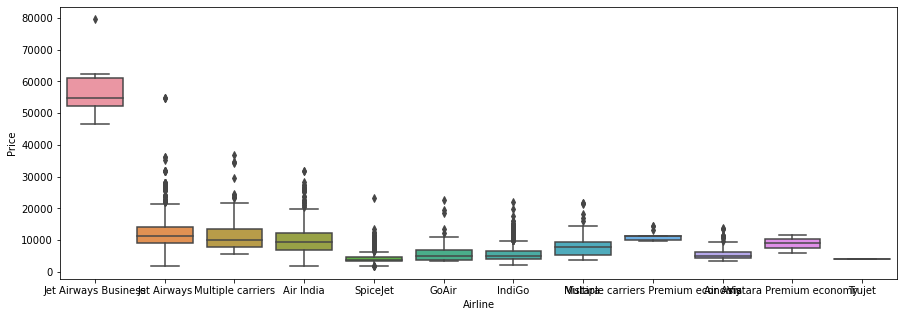

In [41]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price', ascending=False))

In [42]:
def create_boxplot(df,col):
    plt.figure(figsize=(15,5))
    sns.boxplot(x=col,y='Price',data=df.sort_values('Price', ascending=False))

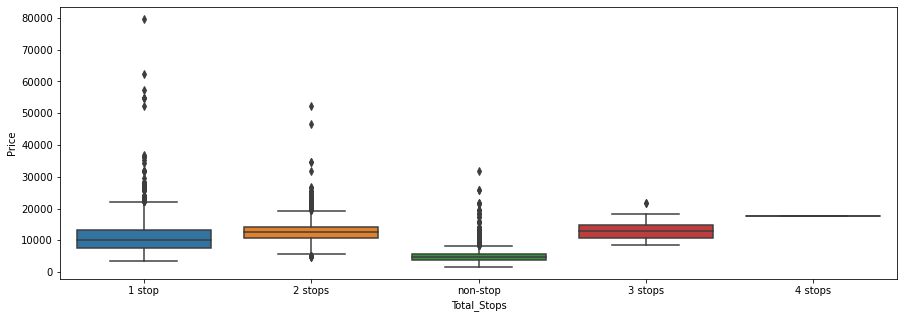

In [43]:
#using boxplot foe totAl stop
create_boxplot(df,'Total_Stops')

In [44]:
#use hotencoding for categorical data
Airline =  pd.get_dummies(catagorical_data['Airline'],drop_first=True)
Airline

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [45]:
catagorical_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

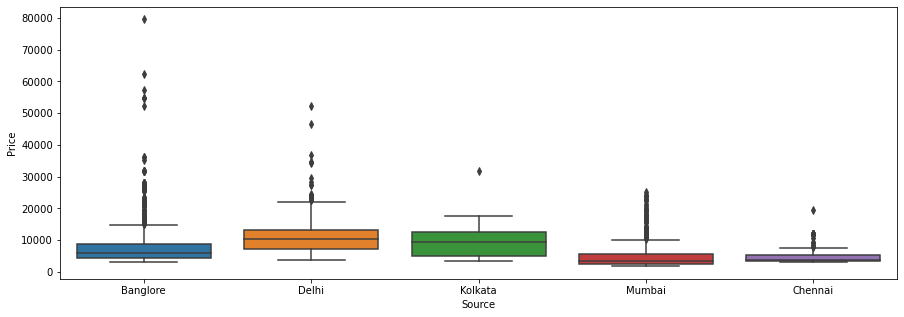

In [46]:
create_boxplot(df,'Source')

In [47]:
Source =  pd.get_dummies(catagorical_data['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


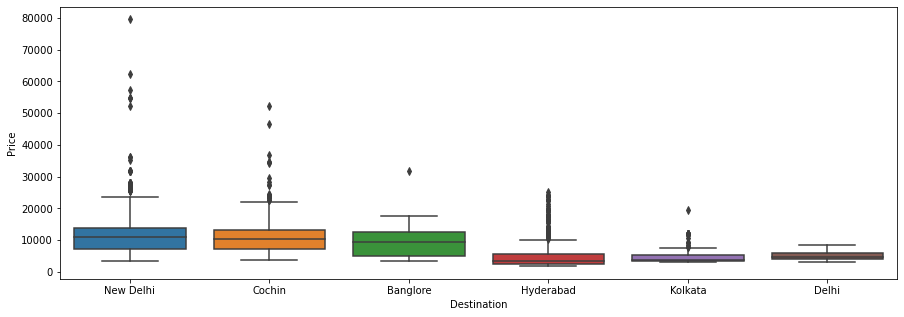

In [48]:
create_boxplot(df,'Destination')

In [49]:
Destination =  pd.get_dummies(catagorical_data['Destination'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [50]:
# as rout has special sperator we will follow a different approch to deal with it.
catagorical_data['Route'].str.split(' → ').str[0]

0        BLR
1        CCU
2        DEL
3        CCU
4        BLR
        ... 
10678    CCU
10679    CCU
10680    BLR
10681    BLR
10682    DEL
Name: Route, Length: 10682, dtype: object

In [51]:
#creating the 5 different columns for the data.
catagorical_data['Route_1'] = catagorical_data['Route'].str.split(' → ').str[0]
catagorical_data['Route_2'] = catagorical_data['Route'].str.split(' → ').str[1]
catagorical_data['Route_3'] = catagorical_data['Route'].str.split(' → ').str[2]
catagorical_data['Route_4'] = catagorical_data['Route'].str.split(' → ').str[3]
catagorical_data['Route_5'] = catagorical_data['Route'].str.split(' → ').str[4]

<ipython-input-51-6ca33d499d49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catagorical_data['Route_1'] = catagorical_data['Route'].str.split(' → ').str[0]
<ipython-input-51-6ca33d499d49>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catagorical_data['Route_2'] = catagorical_data['Route'].str.split(' → ').str[1]
<ipython-input-51-6ca33d499d49>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [52]:
catagorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [53]:
drop_col(catagorical_data,'Route')

C:\Users\Hp\new_conda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [54]:
catagorical_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [55]:
catagorical_data.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [56]:
#replacing the null values
for i in ['Route_3','Route_4','Route_5']:
    catagorical_data[i].fillna('None', inplace=True)

C:\Users\Hp\new_conda\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [57]:
catagorical_data.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [58]:
for i in catagorical_data.columns:
    print('{} has total {} catagories'.format(i,len(catagorical_data[i].value_counts())))

Airline has total 12 catagories
Source has total 5 catagories
Destination has total 6 catagories
Total_Stops has total 5 catagories
Additional_Info has total 10 catagories
Route_1 has total 5 catagories
Route_2 has total 40 catagories
Route_3 has total 27 catagories
Route_4 has total 12 catagories
Route_5 has total 6 catagories


In [59]:
# as route 2, 3 has a high amount of the catagories 
#if we will perform the hot_encoding it will create a large amount of set so
#instead of that we will perform label_encoding instead.

In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
encoder=LabelEncoder()

In [62]:
catagorical_data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [63]:
# encoding the data of routes.
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    catagorical_data[i] = encoder.fit_transform(catagorical_data[i])

<ipython-input-63-5f30c3b9492f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catagorical_data[i] = encoder.fit_transform(catagorical_data[i])


In [64]:
catagorical_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,10,21,10,4
1,Air India,Kolkata,Banglore,2 stops,No info,2,20,1,3,4
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,27,4,5,4
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,29,3,10,4
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,29,7,10,4


In [65]:
# in additional_info no infromation perovided for most of the data do we drop it
drop_col(catagorical_data,'Additional_Info')

C:\Users\Hp\new_conda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [66]:
catagorical_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [67]:
# we are going to self replace the data.
dict = {'non-stop':0,'2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [68]:
catagorical_data['Total_Stops'] = catagorical_data['Total_Stops'].map(dict)

<ipython-input-68-67b04b1417bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catagorical_data['Total_Stops'] = catagorical_data['Total_Stops'].map(dict)


In [69]:
catagorical_data.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,10,21,10,4
1,Air India,Kolkata,Banglore,2,2,20,1,3,4
2,Jet Airways,Delhi,Cochin,2,3,27,4,5,4
3,IndiGo,Kolkata,Banglore,1,2,29,3,10,4
4,IndiGo,Banglore,New Delhi,1,0,29,7,10,4


In [70]:
data_train = pd.concat([catagorical_data,Airline,Source,Destination,df[num_col]],axis=1)

In [71]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,...,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_mintues
0,IndiGo,Banglore,New Delhi,0,0,10,21,10,4,0,...,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,20,1,3,4,1,...,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,27,4,5,4,0,...,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,29,3,10,4,0,...,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,29,7,10,4,0,...,1,13302,3,1,16,50,21,35,4,45


In [72]:
for i in ['Airline','Source','Destination']:
    drop_col(data_train,i)

In [73]:
pd.set_option("display.max_columns", None)
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_mintues
0,0,0,10,21,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,20,1,3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,27,4,5,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,29,3,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,29,7,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [74]:
data_train.shape

(10682, 35)

In [75]:
#dealing with outliers
def plot(df,col):
    fig,(ax1,ax2)= plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)       

C:\Users\Hp\new_conda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\new_conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


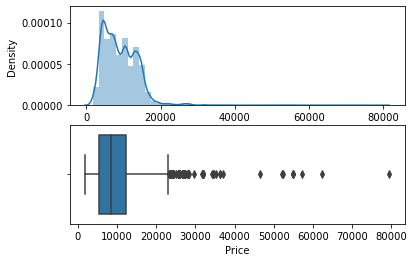

In [76]:
plot(data_train,'Price')

In [77]:
#talking with the domain expertise they say more the 40,000 are my outliers.
# replace them with median
#with the "where" function of numpy.

In [78]:
data_train['Price'] = np.where(data_train['Price']>40000,data_train['Price'].median(),data_train['Price'])

C:\Users\Hp\new_conda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\new_conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


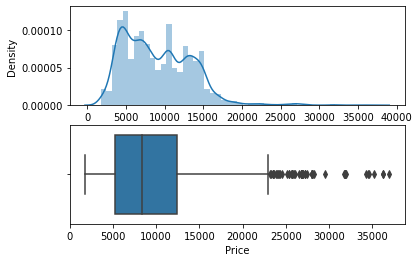

In [79]:
plot(data_train,'Price')

In [80]:
#sperating the dependaple quantity and undependent quantity.
x = data_train.drop('Price',axis=1)
y = data_train['Price']

In [81]:
x

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_mintues
0,0,0,10,21,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,20,1,3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,27,4,5,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,29,3,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,29,7,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2,5,21,10,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,9,19,55,22,25,2,30
10679,0,2,5,21,10,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,27,4,20,45,23,20,2,35
10680,0,0,10,21,10,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,27,4,8,20,11,20,3,0
10681,0,0,10,21,10,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3,1,11,30,14,10,2,40


In [82]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [83]:
# we will use best feature selection using infromation gain
from sklearn.feature_selection import mutual_info_classif

In [84]:
mutual_info_classif(x,y)

array([2.11443798, 2.0519109 , 2.42222342, 2.18401022, 1.08584029,
       1.78666912, 0.76686288, 0.10404247, 0.6698193 , 0.91189391,
       0.01532664, 0.57311754, 0.02027784, 0.32350725, 0.        ,
       0.21621458, 0.        , 0.17602693, 1.54985591, 0.90006278,
       0.29510268, 1.54291774, 0.41549511, 0.29681457, 0.18116894,
       0.37965243, 1.08052014, 0.87875383, 1.43144838, 1.20183248,
       1.85248017, 1.51264842, 1.78349969, 1.06949836])

In [85]:
data_frame = pd.DataFrame(mutual_info_classif(x,y),index=x.columns)

In [86]:
data_frame

,0
Total_Stops,2.119050
Route_1,2.041732
Route_2,2.425638
Route_3,2.214834
Route_4,1.102050
Route_5,1.823829
Air India,0.760637
GoAir,0.095099
IndiGo,0.656024
Jet Airways,0.926644


In [87]:
data_frame.columns = ['importance']
data_frame.sort_values(by='importance', ascending=False)

,importance
Route_2,2.425638
Route_3,2.214834
Total_Stops,2.119050
Route_1,2.041732
Arrival_Time_hour,1.857841
Route_5,1.823829
Duration_hour,1.794969
Cochin,1.564441
Delhi,1.551593
Arrival_Time_minute,1.540480


In [88]:
for i in ['Multiple carriers Premium economy','Jet Airways Business','Trujet','Vistara Premium economy']:
    drop_col(x,i)


C:\Users\Hp\new_conda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [89]:
x

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_mintues
0,0,0,10,21,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,20,1,3,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,27,4,5,4,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,29,3,10,4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,29,7,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2,5,21,10,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,9,19,55,22,25,2,30
10679,0,2,5,21,10,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,27,4,20,45,23,20,2,35
10680,0,0,10,21,10,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,27,4,8,20,11,20,3,0
10681,0,0,10,21,10,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,3,1,11,30,14,10,2,40


In [90]:
#split the data
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [98]:
from sklearn import metrics
import pickle

In [105]:
#To automate the prediction and check the score

def predict(ml_model,dump):
    model = ml_model.fit(X_train,y_train)
    print('Training Score = {}'.format(model.score(X_train,y_train)))
    y_pred = model.predict(X_test)
    print('predictions are\n {}'.format(y_pred))
    print('\n')
    
    r2_score = metrics.r2_score(y_test,y_pred)
    print('r2 score is {}'.format(r2_score))
    
    print('MAE: ',metrics.mean_absolute_error(y_test,y_pred))
    print('MSE: ',metrics.mean_squared_error(y_test,y_pred))
    print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    
    sns.distplot(y_test-y_pred)
    
    if dump == 1:
        file = open(r'E:\Machine learning\ML assignment\flight ticket price prediction\model.pkl','wb')
        pickle.dump(model,file)
        

In [94]:
from sklearn.ensemble import RandomForestRegressor

Training Score = 0.9518197006639411
predictions are
 [16683.62        7757.15        8904.99       ...  6792.22
 12773.76769048 13156.48666667]


r2 score is 0.8304931883576616
MAE:  1154.7113136447601
MSE:  3471460.7088098815
RMSE:  1863.1856345543997


C:\Users\Hp\new_conda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


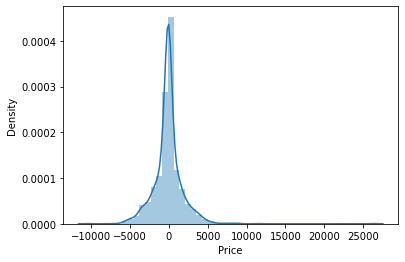

In [106]:
predict(RandomForestRegressor(),1)

In [ ]:
# dumping my model.

In [107]:
# pass more algorithium.
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

Training Score = 0.6155974436802747
predictions are
 [12776.76300429  8334.21314205  9664.40349209 ...  7239.43428741
 10878.25152336 11890.97128427]


r2 score is 0.6045242252774905
MAE:  1966.6036487069978
MSE:  8099253.357039905
RMSE:  2845.9187193312296


C:\Users\Hp\new_conda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


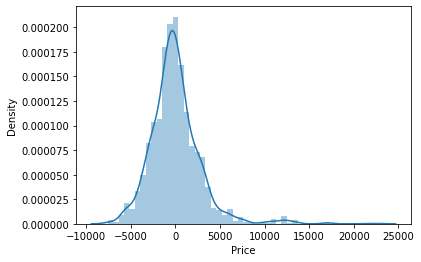

In [108]:
predict(LinearRegression(),0)

Training Score = 0.7756973807348475
predictions are
 [16315.   5158.2  8441.6 ...  6471.8  7140.  11467.6]


r2 score is 0.6397818636375661
MAE:  1773.1220402433316
MSE:  7377184.992550303
RMSE:  2716.0973827442754


C:\Users\Hp\new_conda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


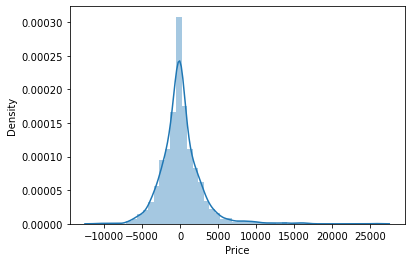

In [109]:
predict(KNeighborsRegressor(),0)

Training Score = 0.9656605025637308
predictions are
 [16840. 10161.  8610. ...  7452. 13339. 14335.]


r2 score is 0.7485623868268538
MAE:  1320.1773826236156
MSE:  5149384.773334373
RMSE:  2269.225588903486


C:\Users\Hp\new_conda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


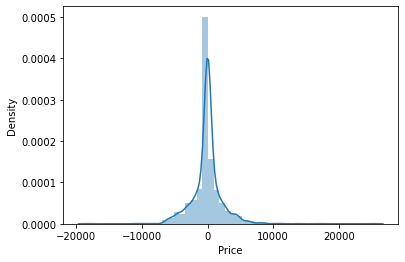

In [124]:
predict(DecisionTreeRegressor(),0)

In [143]:
#cross validitation
##1 randomiseCV and grid search
###hypertunning
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
RandomizedSearchCV()

In [117]:
n_estimator = [int(x) for x in np.linspace(start=100, stop=1200, num=6)]
max_depth = [int(x) for x in np.linspace(start=5, stop=30, num=4)]

In [134]:
Random_grid = {
    'n_estimators': n_estimator,
    'max_features':['auto','sqrt'],
    'max_depth': max_depth,
    'min_samples_split':[5,10,15,100]
}

In [135]:
Random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [136]:
rad_forest = RandomForestRegressor()

In [137]:
rf_random = RandomizedSearchCV(estimator=rad_forest, param_distributions=Random_grid, cv=3, verbose=2, n_jobs=-1)

In [138]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [139]:
rf_random.best_params_

{'n_estimators': 980,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 13}

In [140]:
predict = rf_random.predict(X_test)

C:\Users\Hp\new_conda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

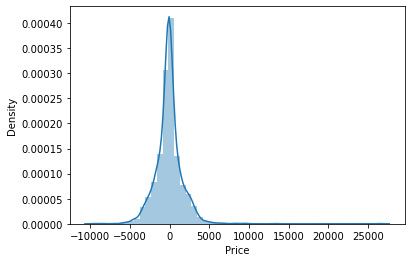

In [141]:
sns.distplot(y_test-predict)

In [142]:
metrics.r2_score(y_test,predict)

0.8521719648655697

In [148]:
file = open(r'E:\Machine learning\ML assignment\flight ticket price prediction\rand_model.pkl','wb')
pickle.dump(rf_random,file)

In [153]:
file_2 = open(r'E:\Machine learning\ML assignment\flight ticket price prediction\model.pkl','rb')

In [154]:
forest = pickle.load(file_2)

In [156]:
predic = forest.predict(X_test)

In [157]:
metrics.r2_score(y_test,predic)

0.8304931883576616